In [1]:
# EXTENSIONS
%load_ext autoreload
%autoreload 2

In [2]:
# IMPORTS
import os
import torch
import rasterio
import numpy as np
import pandas as pd
from glob import glob
from model import RoCNN
import matplotlib.pyplot as plt
from data_director import DataDirector

In [12]:
# INITIALIZE DATA DIRECTOR
dd = DataDirector(dir_data="../data/db/trn_val_tst/processed",
                  split_pc_trn=0.8,
                  split_pc_val=0.1,
                  batch_size=16)

Finding min and max values per band ... Done :)
Initializing DataLoaders ... Done :)


In [ ]:
# VIEW SPLIT SIZES
print("Training set size =", len(dd.dataloader["trn"].dataset))
print("Validation set size =", len(dd.dataloader["val"].dataset))
print("Testing set size =", len(dd.dataloader["tst"].dataset))

Training set size = 416
Validation set size = 52
Testing set size = 53


In [7]:
# GET SAMPLE BATCH
y, x = list(dd.dataloader["trn"])[0]
if y.ndim == 1: # Prepare y.
    y = y.unsqueeze(1) # make [B,1].
    y = y.to(torch.float32) # convert to float.

In [6]:
# CREATE MODEL
m = RoCNN()
# Load a checkpoint.
m.load_state_dict(torch.load("./checkpoints/roc_best.pt",
                             map_location="cpu"))

<All keys matched successfully>

In [8]:
# Get predictions.
p = m(x)
p = (p > 0.5).to(torch.float32)
print("p =", p.flatten().numpy().tolist())
print("y =", y.flatten().numpy().tolist())

p = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
y = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


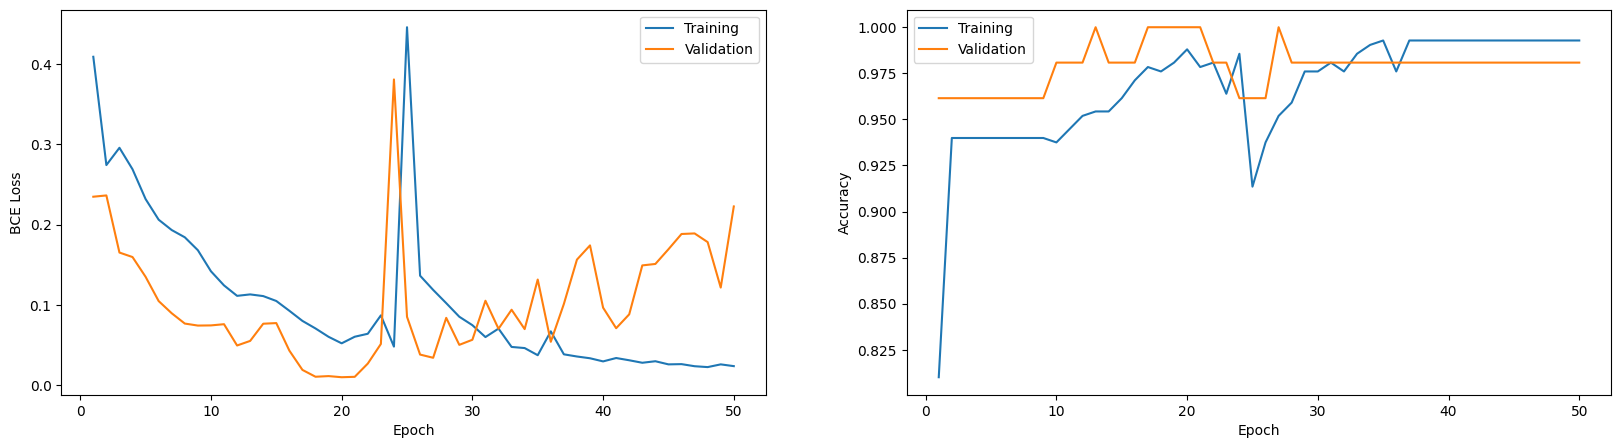

In [14]:
# VIEW LEARNING CURVES
log_df = pd.read_csv("./logs/log.csv")

fig, ax = plt.subplots(figsize=(20,5), ncols=2, nrows=1)
ax[0].plot(log_df["epoch"], log_df["trn_loss"], label="Training")
ax[0].plot(log_df["epoch"], log_df["val_loss"], label="Validation")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("BCE Loss")
ax[0].legend()

ax[1].plot(log_df["epoch"], log_df["trn_acc"], label="Training")
ax[1].plot(log_df["epoch"], log_df["val_acc"], label="Validation")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

,presence,count
0,absent,32
1,present,489


<BarContainer object of 2 artists>

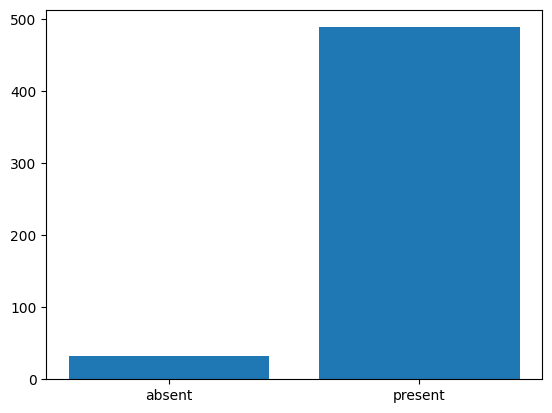

In [ ]:
# VIEW NO. OF PRESET AND ABSENT DATA POINTS
absent_present_count = pd.DataFrame({"presence": ["absent", "present"],
                                     "count": [32, 489]}) 
# Counts above from presence and absence folders at 
# /data/db/trn_val_tst/raw.
display(absent_present_count)
plt.bar(absent_present_count['presence'], 
        absent_present_count['count'])